In [1]:
import os
import sys
import time
import operator
import itertools
import functools
from multiprocessing import Pool
from collections import OrderedDict
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import ticker
plt.style.use('seaborn')
from mpl_toolkits.basemap import Basemap
import numpy as np
from glob import glob
import h5py
import pandas as pd
import seaborn as sns
#sns.set(style='whitegrid')
from scipy import stats

df = pd.read_csv('./fermigbrst.txt',delimiter='|',header=0,skipfooter=3,engine='python')
trigger_name = df['trigger_name'].apply(lambda x:x.strip()).values
t90_raw = df[df.columns[1]].apply(lambda x:x.strip()).values
t90_error_raw = df[df.columns[2]].apply(lambda x:x.strip()).values
t90_start_raw = df[df.columns[3]].apply(lambda x:x.strip()).values

t90 = t90_raw[~(t90_raw == 'null')]
t90_error = t90_error_raw[~(t90_raw == 'null')]
t90_start = t90_start_raw[~(t90_raw == 'null')]
t90 = t90.astype(np.float)
t90_error = t90_error.astype(np.float)
t90_start = t90_start.astype(np.float)

In [2]:
# http://cmdlinetips.com/2018/03/probability-distributions-in-python/

(0, 200)

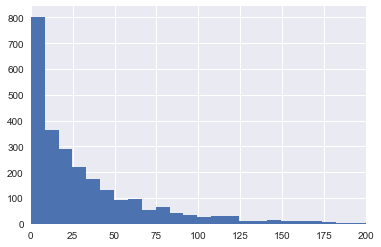

In [3]:
plt.hist(t90,100)
plt.xlim([0,200])

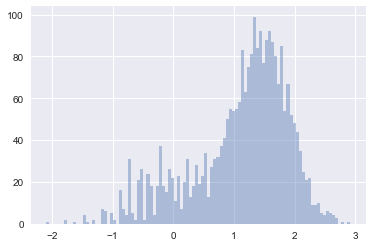

In [4]:
ax = sns.distplot(np.log10(t90),kde=False,bins=100)

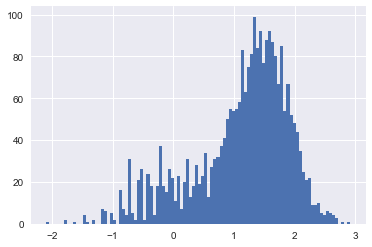

In [5]:
ax = plt.hist(np.log10(t90),bins=100)

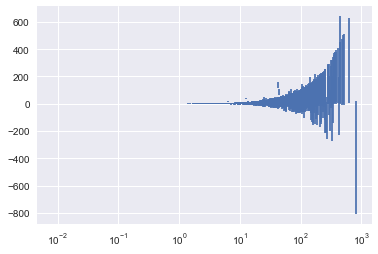

In [6]:
plt.errorbar(t90,t90_start+t90/2,yerr=t90/2,ls='None')
plt.xscale('log')

(-0.1, 0.1)

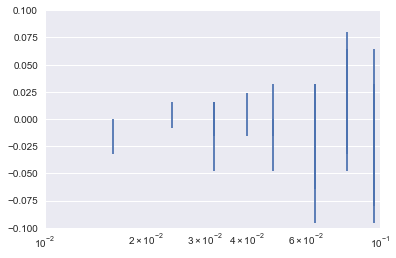

In [7]:
plt.errorbar(t90,t90_start+t90/2,yerr=t90/2,ls='None')
plt.xscale('log')
plt.xlim([0.01,0.1])
plt.ylim([-0.1,0.1])

<ErrorbarContainer object of 3 artists>

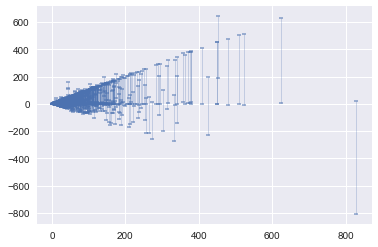

In [45]:
plt.errorbar(t90,t90_start+t90/2,yerr=t90/2,ls='None',capsize=2,capthick=2,elinewidth=0.5,alpha=0.5)

(-10, 10)

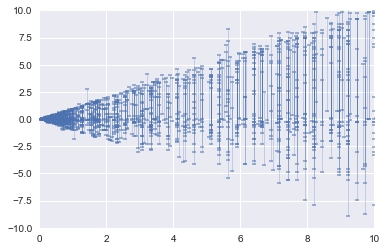

In [44]:
plt.errorbar(t90,t90_start+t90/2,yerr=t90/2,ls='None',capsize=2,capthick=2,elinewidth=0.5,alpha=0.5)
plt.xlim([0,10])
plt.ylim([-10,10])

(0, 50)

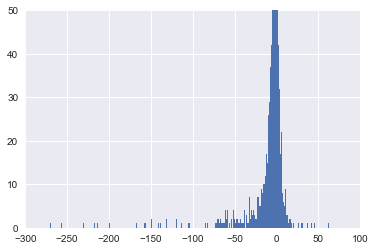

In [9]:
plt.hist(t90_start,1000)
plt.xlim([-300,100])
plt.ylim([0,50])

In [10]:
np.median(t90_start[t90_start<0])

-1.536

In [11]:
len(t90_start[t90_start<-10])

252